# Défi des parties 6 et 7

Le but de l'exercice est de comprendre le jeu de données issues du World Happiness Report (pour les années 2015 à 2019) à l'aide de graphiques. Pour les questions 2 et 3, vous devez afficher un graphique à l'aide de **matplotlib** ou de **seaborn**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mgno

1 - Regrouper les données issues des 5 fichiers CSV (WHR_2015.csv, ...) dans un seul dataframe avec une colonne supplémentaire pour l'année 

In [2]:
list_df = []
for year in range(2015, 2020):
    df = pd.read_csv(f"WHR_{year}.csv")
    df["year"] = str(year)
    list_df.append(df)
result = pd.concat(list_df)
result["year"] = result["year"].astype("category")
print(result["year"].value_counts())
result.info()

2015    158
2016    157
2019    156
2018    156
2017    155
Name: year, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 31 columns):
Country                          470 non-null object
Country or region                312 non-null object
Dystopia Residual                315 non-null float64
Dystopia.Residual                155 non-null float64
Economy (GDP per Capita)         315 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           470 non-null float64
Freedom                          470 non-null float64
Freedom to make life choices     312 non-null float64
GDP per capita                   312 non-null float64
Generosity                       782 non-null float64
Happiness Rank                   315 non-null float64
Happiness Score                  315 non-null float64
Happiness.Rank                   155 non-null float64
Happiness.Score                  155 non-null float64
He

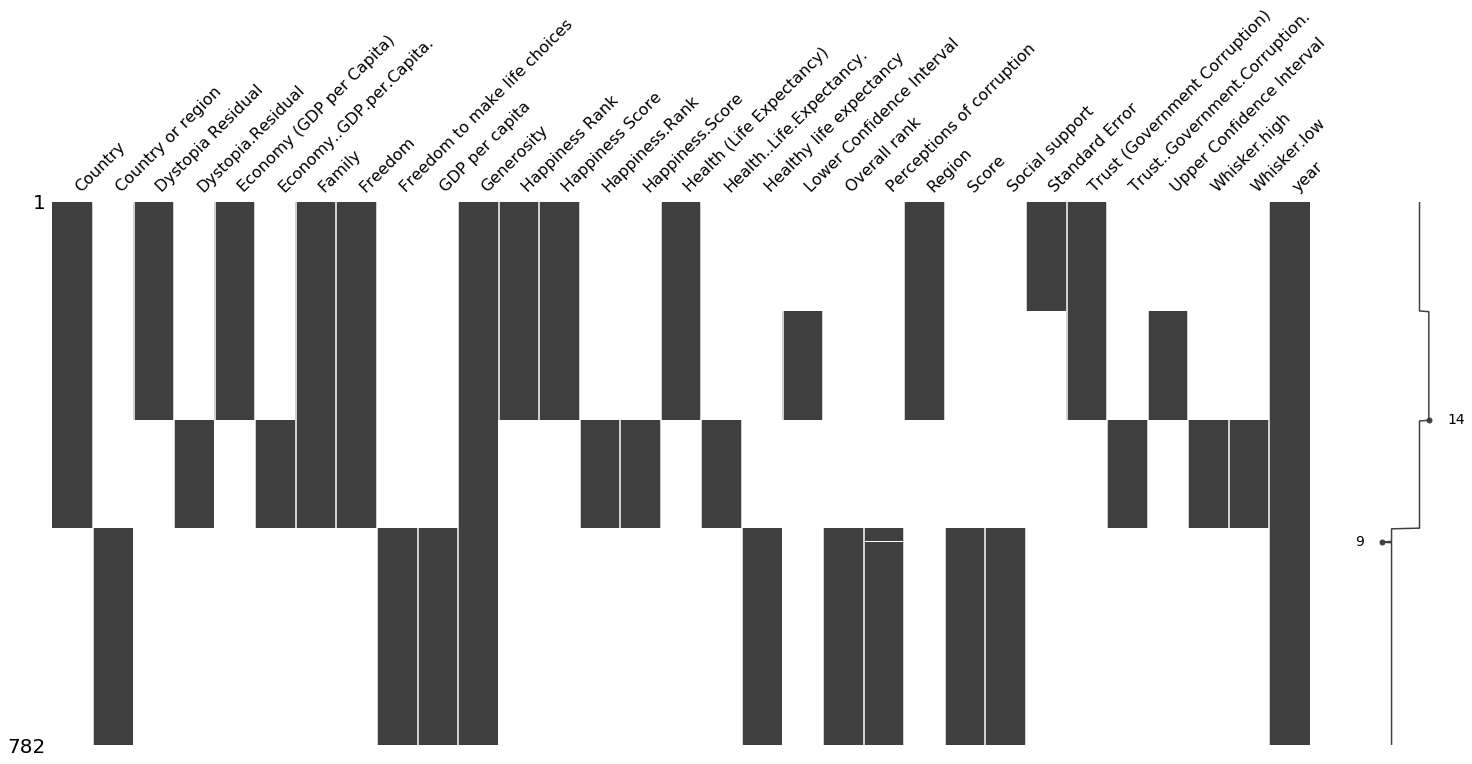

In [3]:
mgno.matrix(result)

## Sélection des colonnes utiles pour l'exercice

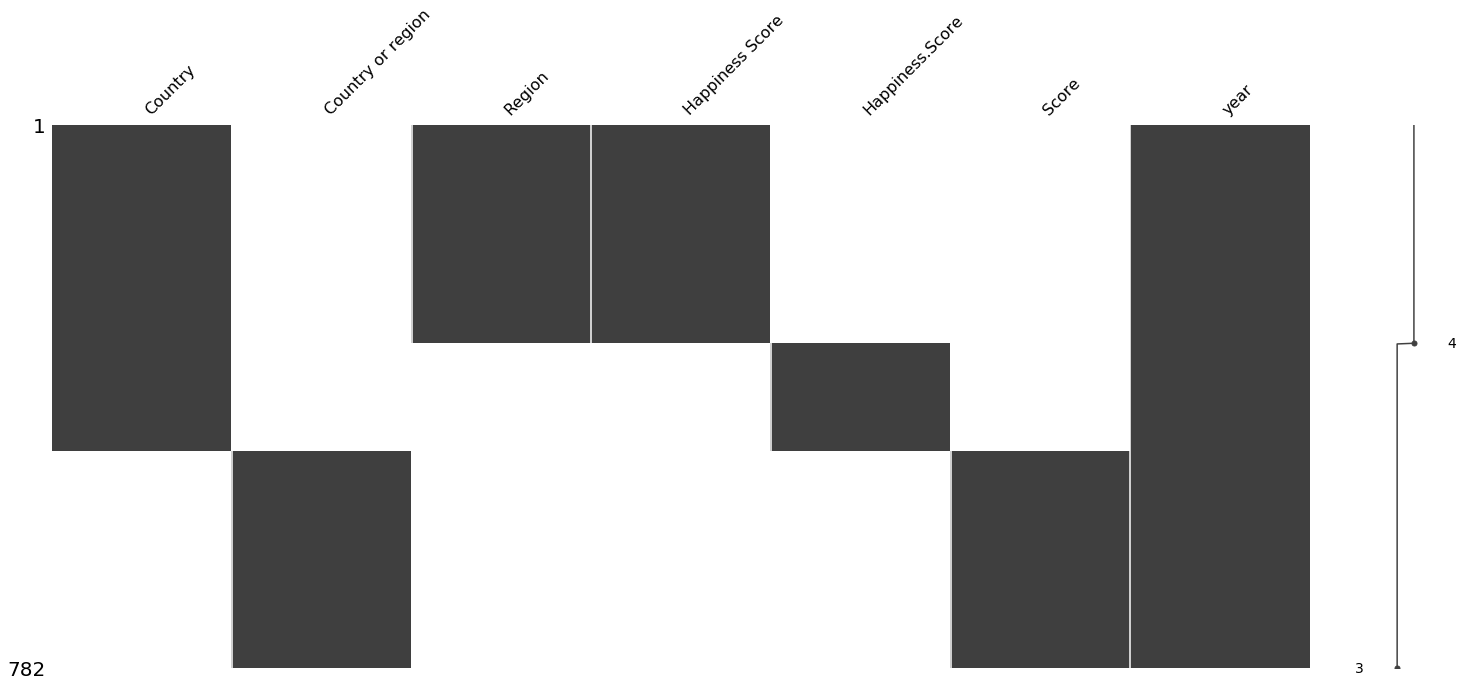

In [4]:
df_useful = result[["Country", "Country or region", "Region", "Happiness Score", "Happiness.Score", "Score", "year"]]
mgno.matrix(df_useful)

       Country Country or region          Region  Happiness Score  \
0  Switzerland               NaN  Western Europe            7.587   
1      Iceland               NaN  Western Europe            7.561   
2      Denmark               NaN  Western Europe            7.527   
3       Norway               NaN  Western Europe            7.522   
4       Canada               NaN   North America            7.427   

   Happiness.Score  Score  year  Hscore  
0              NaN    NaN  2015   7.587  
1              NaN    NaN  2015   7.561  
2              NaN    NaN  2015   7.527  
3              NaN    NaN  2015   7.522  
4              NaN    NaN  2015   7.427  


D:\logiciels\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


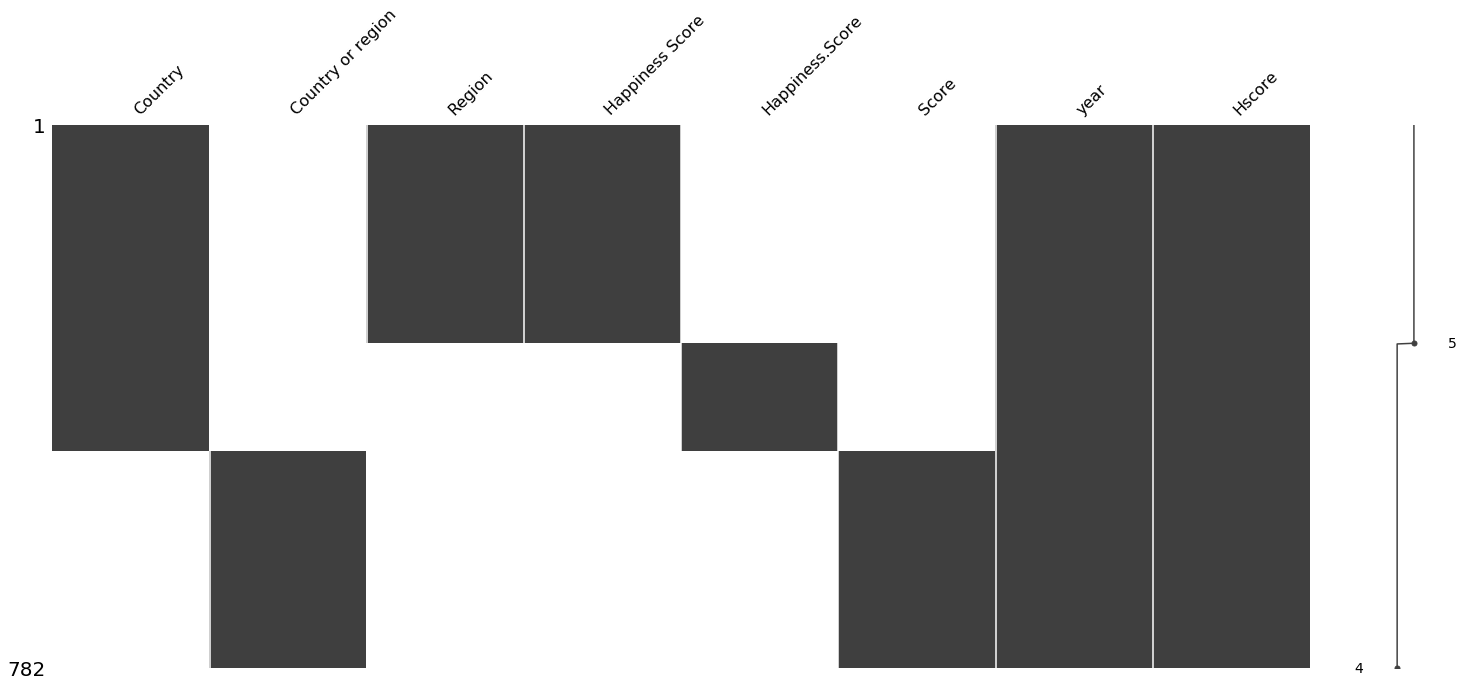

In [5]:
df_useful["Hscore"] = df_useful[["Happiness Score", "Happiness.Score", "Score"]].sum(axis=1)
print(df_useful.head())
mgno.matrix(df_useful)

In [6]:
df_useful = df_useful.drop(["Happiness Score", "Happiness.Score", "Score"], axis="columns")
print(df_useful.info())
df_useful.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 5 columns):
Country              470 non-null object
Country or region    312 non-null object
Region               315 non-null object
year                 782 non-null category
Hscore               782 non-null float64
dtypes: category(1), float64(1), object(3)
memory usage: 31.5+ KB
None


,Country,Country or region,Region,year,Hscore
0,Switzerland,NaN,Western Europe,2015,7.587
1,Iceland,NaN,Western Europe,2015,7.561
2,Denmark,NaN,Western Europe,2015,7.527
3,Norway,NaN,Western Europe,2015,7.522
4,Canada,NaN,North America,2015,7.427


## Nettoyage des noms des pays et des continents

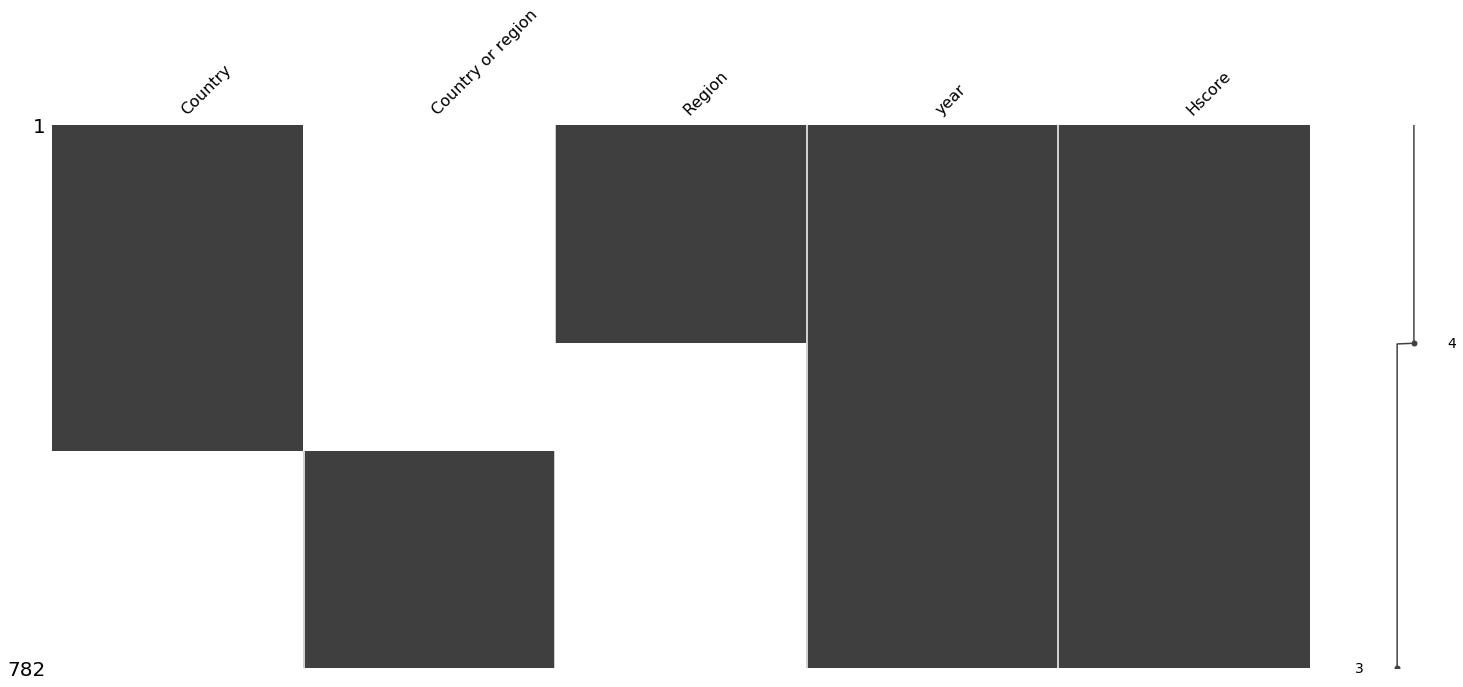

In [7]:
mgno.matrix(df_useful)

In [8]:
df_useful.head()

,Country,Country or region,Region,year,Hscore
0,Switzerland,NaN,Western Europe,2015,7.587
1,Iceland,NaN,Western Europe,2015,7.561
2,Denmark,NaN,Western Europe,2015,7.527
3,Norway,NaN,Western Europe,2015,7.522
4,Canada,NaN,North America,2015,7.427


In [9]:
df_useful.tail()

,Country,Country or region,Region,year,Hscore
151,NaN,Rwanda,NaN,2019,3.334
152,NaN,Tanzania,NaN,2019,3.231
153,NaN,Afghanistan,NaN,2019,3.203
154,NaN,Central African Republic,NaN,2019,3.083
155,NaN,South Sudan,NaN,2019,2.853


In [10]:
df_useful["Region"].value_counts()

Sub-Saharan Africa                 78
Central and Eastern Europe         58
Latin America and Caribbean        46
Western Europe                     42
Middle East and Northern Africa    39
Southeastern Asia                  18
Southern Asia                      14
Eastern Asia                       12
Australia and New Zealand           4
North America                       4
Name: Region, dtype: int64

In [11]:
df_useful["Country or region"].value_counts()

Ivory Coast                2
Belarus                    2
Taiwan                     2
Estonia                    2
Cyprus                     2
Colombia                   2
South Sudan                2
Bhutan                     2
Switzerland                2
Philippines                2
Algeria                    2
Netherlands                2
Slovakia                   2
Syria                      2
Malawi                     2
Azerbaijan                 2
Cambodia                   2
South Africa               2
Ethiopia                   2
Palestinian Territories    2
Singapore                  2
Morocco                    2
China                      2
Georgia                    2
Kuwait                     2
Poland                     2
Togo                       2
Albania                    2
Myanmar                    2
Finland                    2
                          ..
Turkmenistan               2
Mongolia                   2
Laos                       2
Lithuania     

In [12]:
df_useful["Country"] = df_useful["Country"].str.cat(df_useful["Country or region"], na_rep="")

In [13]:
df_useful = df_useful.drop("Country or region", axis="columns")

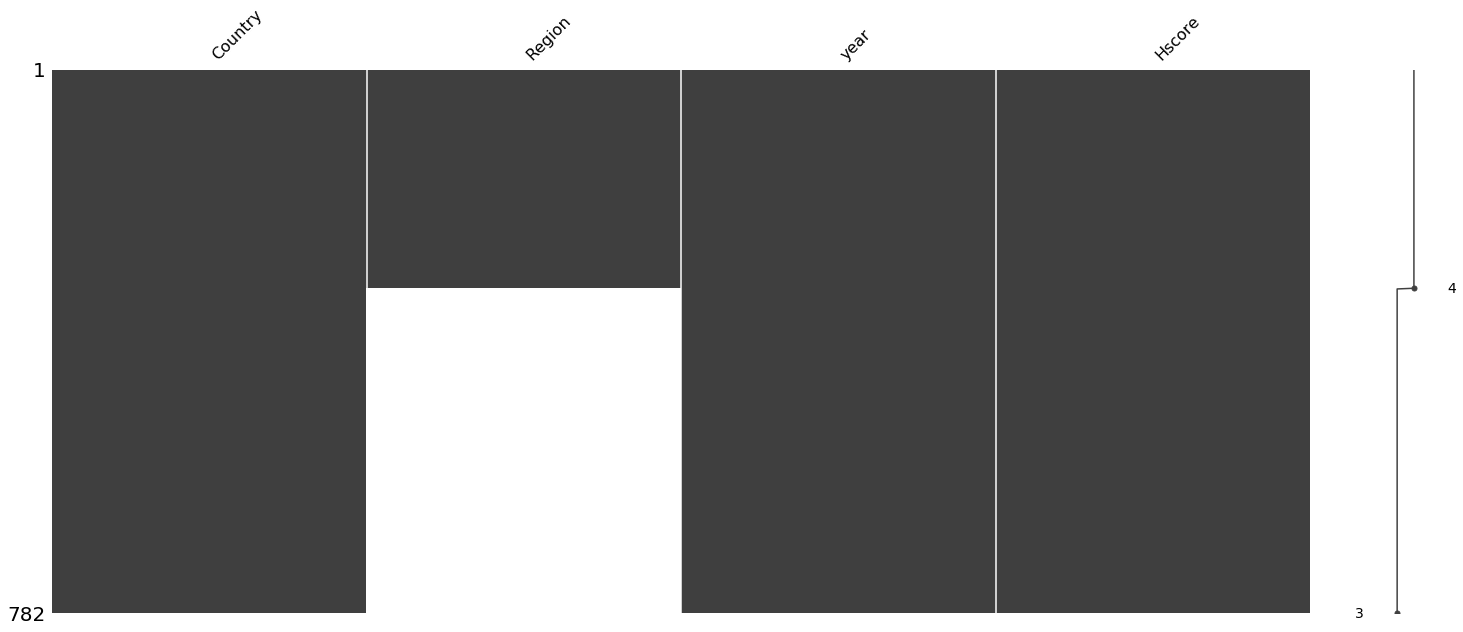

In [14]:
mgno.matrix(df_useful)

In [15]:
df_useful["Country"] = df_useful["Country"].str.upper()

In [18]:
country_region = df_useful.dropna().drop_duplicates(subset=['Country'])
country_region = country_region.drop(["year", "Hscore"], axis="columns")
country_region.head()

,Country,Region
0,SWITZERLAND,Western Europe
1,ICELAND,Western Europe
2,DENMARK,Western Europe
3,NORWAY,Western Europe
4,CANADA,North America


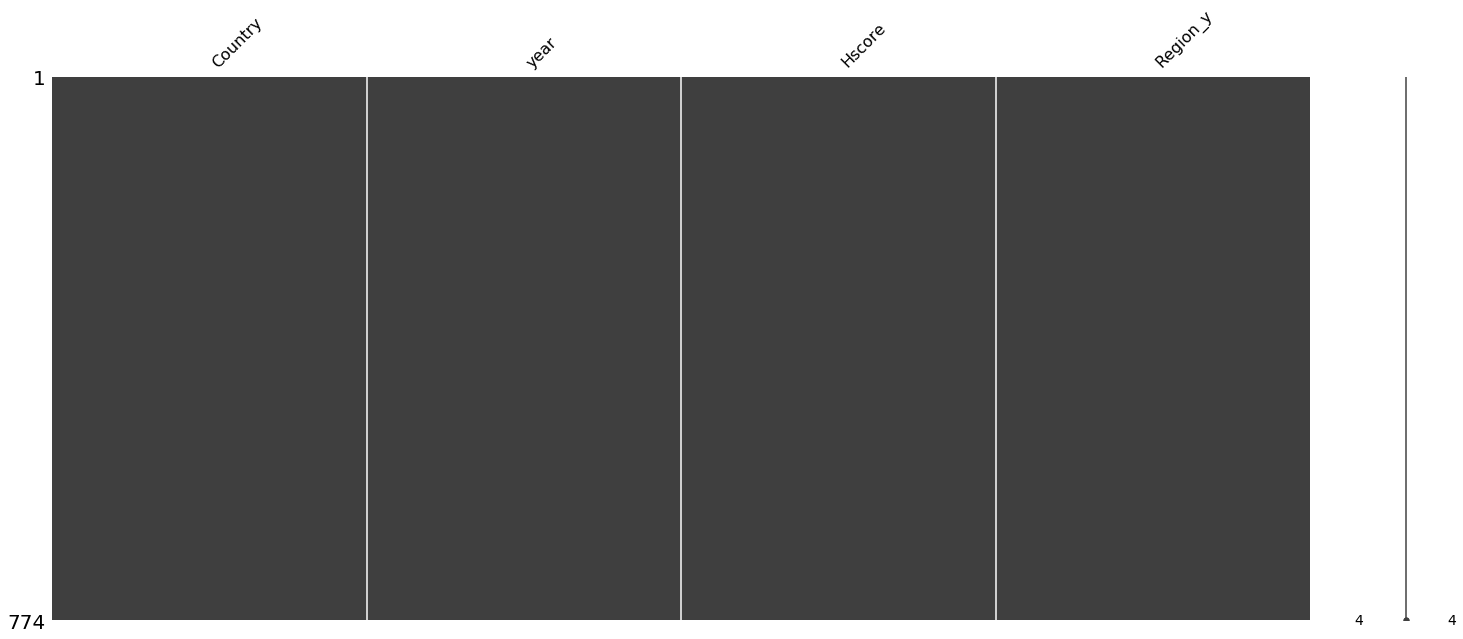

In [36]:
df_useful = df_useful.merge(country_region, on=["Country"])
df_useful = df_useful.drop(["Region_x"], axis="columns")
mgno.matrix(df_useful)

In [38]:
df_useful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 773
Data columns (total 4 columns):
Country     774 non-null object
year        774 non-null category
Hscore      774 non-null float64
Region_y    774 non-null object
dtypes: category(1), float64(1), object(2)
memory usage: 25.1+ KB


2 - Tracer les variations du score de bonheur en fonction des années pour un pays donné (à choisir)

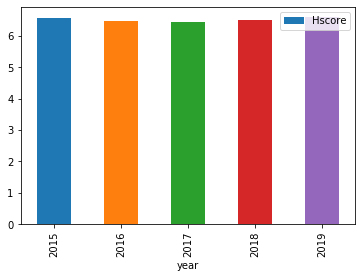

In [39]:
df_useful[df_useful["Country"]=="FRANCE"].plot(x="year", y="Hscore", kind="bar")

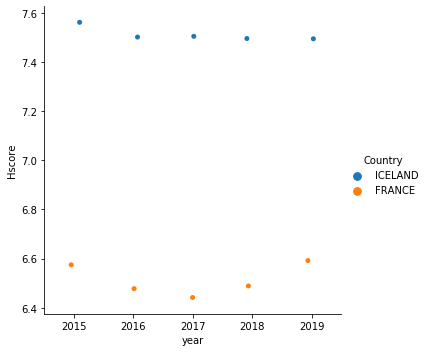

In [46]:
sns.catplot(x="year", y="Hscore", hue="Country", data=df_useful[(df_useful["Country"]=="FRANCE") | (df_useful["Country"]=="ICELAND")])

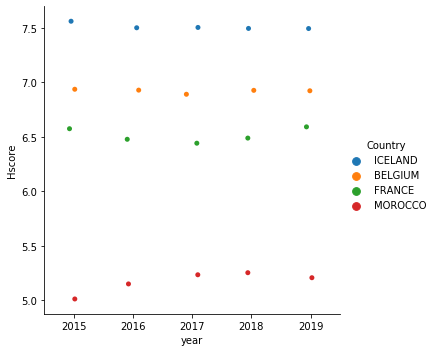

In [58]:
sns.catplot(x="year", y="Hscore", hue="Country", data=df_useful[df_useful["Country"].isin(["FRANCE", "MOROCCO", "ICELAND", "BELGIUM"])])

3 - Comparer les moyennes des scores de bonheur par continent en fonction des années

In [75]:
moy_bonheur = df_useful.groupby(by=["year", "Region_y"]).mean()
moy_bonheur

Hscore
year Region_y                                 
2015 Australia and New Zealand        7.285000
     Central and Eastern Europe       5.332931
     Eastern Asia                     5.626167
     Latin America and Caribbean      6.144682
     Middle East and Northern Africa  5.406900
     North America                    7.273000
     Southeastern Asia                5.317444
     Southern Asia                    4.580857
     Sub-Saharan Africa               4.202800
     Western Europe                   6.689619
2016 Australia and New Zealand        7.323500
     Central and Eastern Europe       5.370690
     Eastern Asia                     5.624167
     Latin America and Caribbean      6.101750
     Middle East and Northern Africa  5.386053
     North America                    7.254000
     Southeastern Asia                5.338889
     Southern Asia                    4.563286
     Sub-Saharan Africa               4.136421
     Western Europe                   6.685667
2017 Australia and New Zealand        7.299000
     Central and Eastern Europe       5.409931
     Eastern Asia                     5.496500
     Latin America and Caribbean      5.957818
     Middle East and Northern Africa  5.369684
     North America                    7.154500
     Southeastern Asia                5.444875
     Southern Asia                    4.628429
     Sub-Saharan Africa               4.111949
     Western Europe                   6.703714
2018 Australia and New Zealand        7.298000
     Central and Eastern Europe       5.463966
     Eastern Asia                     5.672000
     Latin America and Caribbean      5.938619
     Middle East and Northern Africa  5.282737
     North America                    7.107000
     Southeastern Asia                5.313444
     Southern Asia                    4.603857
     Sub-Saharan Africa               4.195026
     Western Europe                   6.829100
2019 Australia and New Zealand        7.267500
     Central and Eastern Europe       5.571786
     Eastern Asia                     5.688833
     Latin America and Caribbean      5.942550
     Middle East and Northern Africa  5.237000
     North America                    7.085000
     Southeastern Asia                5.273667
     Southern Asia                    4.526857
     Sub-Saharan Africa               4.294513
     Western Europe                   6.898400

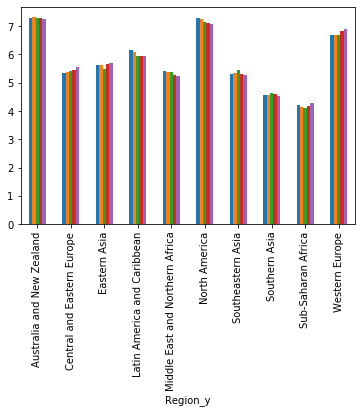

In [79]:
moy_bonheur.unstack(level=0).plot(kind='bar', legend=False)